# Example of Mass Balance Problem in Wastewater Treatment Units
Prepared by Annabelle Li (ali7@nd.edu) and Audrey Hansrisuk (ahansris@nd.edu)

**Reference:** Chapter 4 in *Elementary Principles of Chemical Processes*, 4th ed., Felder, R.M.; Rousseau, R.W.; Bullard, L.G. (2015), **Question 4.44**

**Objectives:**

1.   Apply knowledge of linear algebra concepts to develop mathematical models.
2.   Use Python to solve a linear system of equations for mass balance problems.
3.   Use Python to scale a system up/down.
4.   Use matplotlib to plot and visualize data.

**Target Audience:** Chemical engineering undergraduate students. 

**Helpful Notebooks to Reference:**

[1.11 Visualization with matplotlib](https://ndcbe.github.io/data-and-computing/notebooks/01/Matplotlib.html)

[1.15 Preparing Publiation Quality Figures in Python](https://ndcbe.github.io/data-and-computing/notebooks/01/Publication-Quality-Figures.html)

[4.1 Modeling Systems of Linear Equations](https://ndcbe.github.io/data-and-computing/notebooks/04/Modeling-Systems-of-Linear-Equations.html)

[4.5 Errors in Linear Systems](https://ndcbe.github.io/data-and-computing/notebooks/04/Condition-Number.html)

[4.6 Example: Mass Balance and Linear Algebra](https://ndcbe.github.io/data-and-computing/notebooks/04/Example-Atomic-Mass-Balances.html)

#Wastewater Treatment Problem

Effluents from metal-finishing plants have the potential of discharging undesirable quantities of metals, such as cadmium, nickel, lead, manganese, and chromium, in forms that are detrimental to water and air quality. A local metal-finishing plant has identified a wastewater stream that contains 5.15 wt% chromium (Cr) and devised the following approach to lowering risk and recovering the valuable metal. The wastewater stream is fed to a treatment unit that removes 95% of the chromium in the feed and recycles it to the plant. The residual liquid stream leaving the treatment unit is sent to a waste lagoon. The treatment unit has a maximum capacity of 4,500 kg wastewater/h. If wastewater leaves the finishing plant at a rate higher than the capacity of the treatment unit, the excess (anything above 4,500 kg/h) bypasses the unit and combines with the residual liquid leaving the unit, and the combined stream goes to the waste lagoon.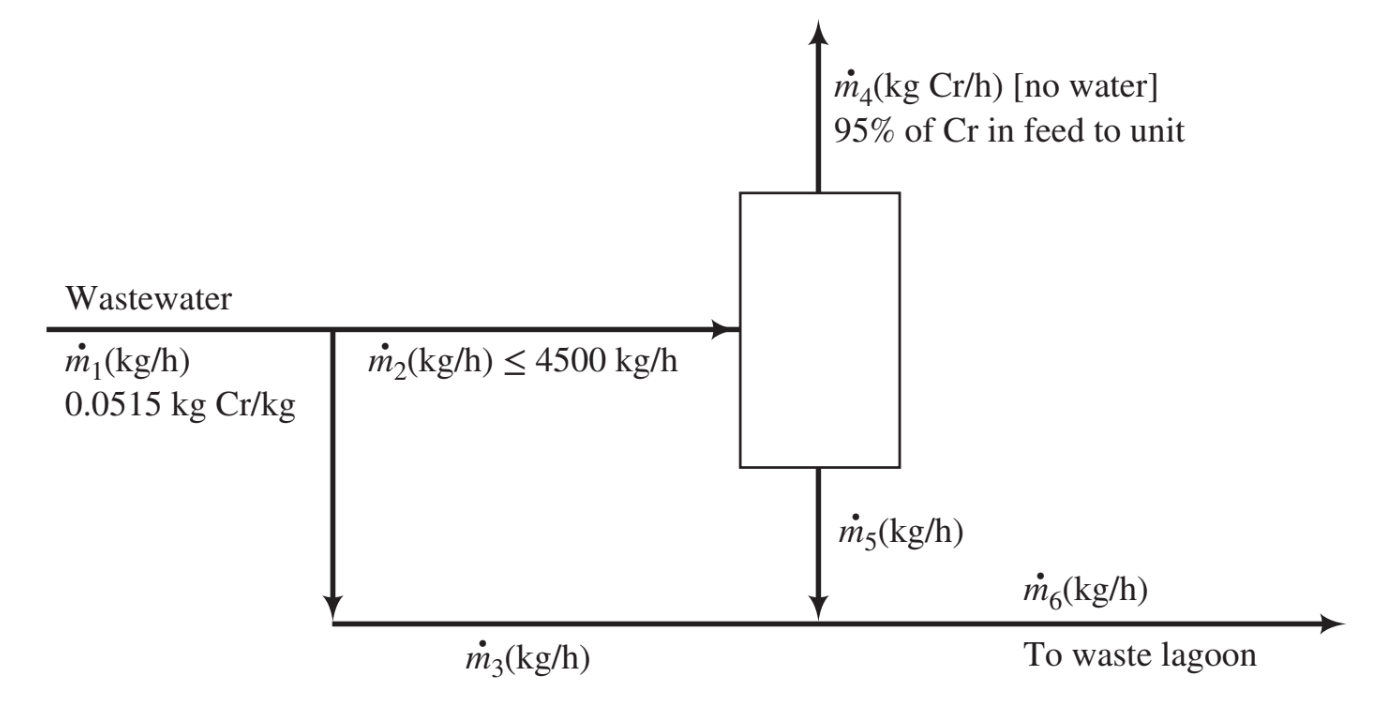

Using the given problem, solve the following:


*   Without assuming a basis of calculation, draw and label a flowchart of the process.
*   Wastewater leaves the finishing plant at a rate $m_{1}$ 6,000 kg/h. Calculate the flow rate of liquid to the waste lagoon, $m_{6}$ kg/h, and the mass fraction of Cr in this liquid, $x_{6}$ (kg Cr/kg).
*   Calculate the flow rate of liquid to the waste lagoon and the mass fraction of Cr in this liquid for $m_{1}$ varying from 1,000 kg/h to 10,000 kg/h in 1,000 kg/h increments. Generate a plot of $x_{6}$ versus $m_{1}$.
* With the information derived throughout this problem, what else would be needed to determine whether or not to add capacity to the treatment unit?



### Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Flowchart
Draw and label a flowchart. Calculate the degrees of freedom for the overall process, treatment unit, and mixing points.

**Answer:**

Degrees of Freedom (DOF) for each point, where $DOF = unknowns - equations$.


*   Overall process: $DOF = 2$ 
*   Treatment unit: $DOF = 2$
*   Mixing point 1: $DOF = 1$
*   Mixing point 2: $DOF = 3$



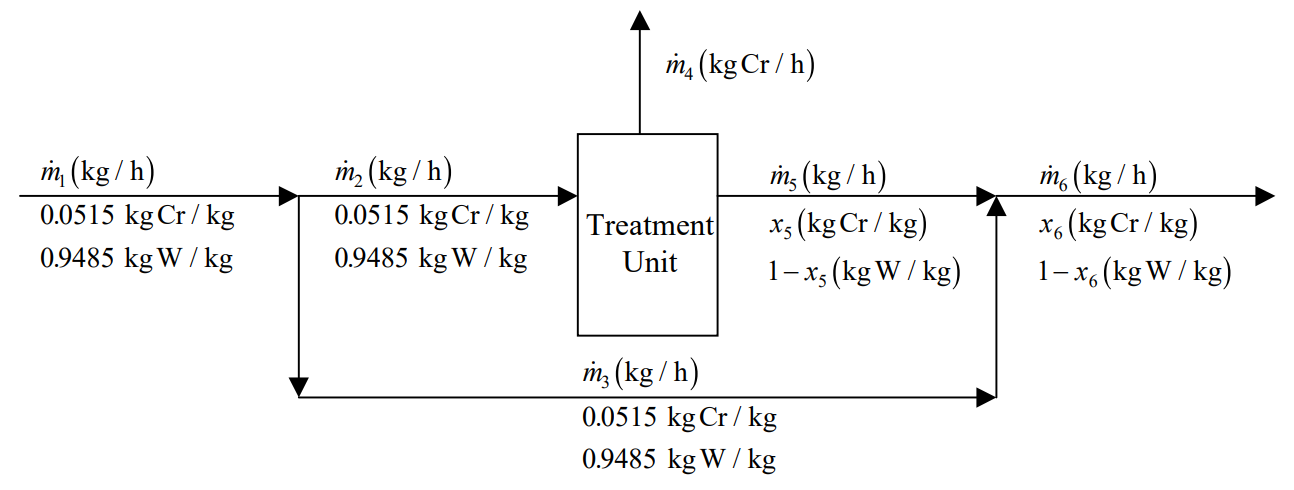

## 2. Mathematical Model to Solve for Unknowns
Propose a mathematical model in to solve for all unknowns. Assume $m_{1}$ = 6,000 kg/h. First, develop a model to solve for the molar flow rates, and then develop another model to solve for the mass fractions. *Hint: Use matrices to develop the mathmetical models, thinking of it in the form of $\mathbf{A}x=b$. Refer to this [Notebook](https://ndcbe.github.io/data-and-computing/notebooks/04/Modeling-Systems-of-Linear-Equations.html) for additional information. These models will then be solved separately in Question 3 to keep all equations linear.*

**Solutions:**

Given values:

*   $m_{1} = 6000 \:\frac{kg}{h}$
*   $m_{2} = 4500 \:\frac{kg}{h}$
*   $x_{1,Cr} = x_{2,Cr} = x_{3,Cr} = 0.0515 \:\frac{kg_{Cr}}{kg}$
*   $x_{1,H_{2}O} = x_{2,H_{2}O} = x_{3,H_{2}O} = 0.9485 \:\frac{kg_{H_{2}O}}{kg}$
*   $x_{4,Cr} = 1.000 \:\frac{kg_{Cr}}{kg}$

Molar Flow Rate Equations:

*   $m_3 = m_1 - m_2$
*   $m_4 = 0.95\times m_2\times x_{2,Cr}$
*   $m_2 = m_4 + m_5$
*   $m_1 = m_4 + m_6$

Matrix form:
$$
\begin{equation}
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 1 & 1 & 0\\
0 & 1 & 0 & 1
\end{bmatrix} \cdot 
\begin{bmatrix}
	m_3 \\
	m_4 \\
	m_5 \\
	m_6
\end{bmatrix} = 
\begin{bmatrix}
	m_1 - m_2 \\
	0.95m_2\times x_{2,Cr} \\
	m_2 \\
	m_1
\end{bmatrix}
\end{equation}
$$

Mass Fraction Equations:

*   $m_5\times x_{5,Cr} = m_2\times x_{2,Cr} - m_4\times x_{4,Cr}$
*   $m_3\times x_{3,Cr} = m_6\times x_{6,Cr} - m_5\times x_{5,Cr}$
*   $x_{5,Cr} + x_{5,H_{2}O} = 1$
*   $x_{6,Cr} + x_{6,H_{2}O} = 1$

Matrix form:
$$
\begin{equation}
\begin{bmatrix}
m_5 & 0 & 0 & 0\\
-m_5 & m_6 & 0 & 0\\
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1
\end{bmatrix} \cdot 
\begin{bmatrix}
	x_{5,Cr} \\
	x_{6,Cr} \\
	x_{5,H_{2}O} \\
	x_{6,H_{2}O}
\end{bmatrix} = 
\begin{bmatrix}
	m_2\times x_{2,Cr} - m_4\times x_{4,Cr} \\
	m_3\times x_{3,Cr} \\
	1 \\
	1
\end{bmatrix}
\end{equation}
$$

## 3. Solve the Linear Systems Using Python

###3a. Solving for All Flow Rates
First, define the function ``solve_flow`` to solve for all unknown flow rates for any basis. *Hint: numpy has a function to solve for unknowns in a linear system.*

In [19]:
# Given values
x1_Cr = x2_Cr = x3_Cr = 0.0515      # kg Cr/kg
x1_H2O = x2_H2O = x3_H2O = 0.9485   # kg H2O/kg
x4_Cr = 1                           # kg Cr/kg

def solve_flow(m1, m2):
  """
  Function to solve the linear model developed to solve for molar flow rates.
  Arguments:
      m1: basis for molar flow rate of m1
      m2: basis for molar flow rate of m2
  Returns:
      x: vector containing the solved values of unknown flow rates
  """
  # Add your solution hereS

Store your answer in the numpy array ``m_flow`` and print your solutions.

In [20]:
# Add your solution hereS

The mass flows are:
m3 = 1500.0 kg/h
m4 = 220.2 kg/h
m5 = 4279.8 kg/h
m6 = 5779.8 kg/h


###3b. Matrix Rank and Condition Number
What is the rank and condition number of the A matrix in your mathematical model? Print your answers to the screen. *Hint: Refer to this [Notebook](https://ndcbe.github.io/data-and-computing/notebooks/04/Condition-Number.html) for notes on matrix rank and condition number.*

In [ ]:
# Add your solution hereS

Rank = 4
Condition number = 3.7320508075688776


**Discussion Question:** Based on these values, is the model linearly dependent or independent? What is the significance of the rank and condition number?

**Answer:** The rank of the matrix indicates how many linearly independent equations there are. The rank is 4, so all 4 equations are independent. The condition number tells how the solution changes with uncertainty in the known values. Based on these values, the system is linearly independent.

###3c. Solving for All Mass Fractions
Next, define the function ``solve_comp`` to solve for all unknown mass fractions given all the molar flow rates. Store your answer in the numpy array ``x_mass`` and print your solutions. *Hint: You can solve this in the same manner as in 3a.*

In [26]:
def solve_comp(m2, m_flow):
    """
    Function to solve the linear model developed to solve for mass fractions.
    Arguments:
        m2: basis for molar flow rate of m2
        m_flow: molar flow rates of m3, m4, m5, m6 corresponding to the basis for m2
    Returns:
        x: vector containing the solved values of unknown mass fractions
    """
    # Add your solution hereS

The mass fractions are:
x5_Cr = 0.00271 kg Cr/kg
x6_Cr = 0.03119 kg Cr/kg
x5_H2O = 0.99729 kg H2O/kg
x6_H2O = 0.96881 kg H2O/kg


## 4. Plotting $x_{6,Cr}$ vs. $m_{1}$
Vary $m_{1}$ from 1,000 kg/h to 10,000 kg/h in 500 kg/h increments and solve for the corresponding $x_{6,Cr}$ values. Plot $x_{6,Cr}$ versus $m_{1}$.

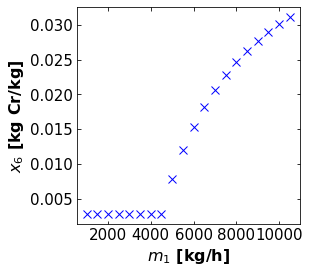

In [28]:
# Add your solution hereS

**Discussion Question:** What trend do you observe in the plot, and what causes this trend? Is there an optimal value of $m_{1}$ where $m_{1}$ is maximized and $x_{6,Cr}$ is minimized?

**Answer:** For $m_{1}$ values from 1000 to 4500 kg/h, $x_{6,Cr}$ is small and stays constant. For $m_{1}$ values above 4500 kg/h, $x_{6,Cr}$ increases. The reason why $x_{6,Cr}$ is constant and then increases is because the treatment unit has a maximum capacity of 4500 kg/h. For feed flow rates above 4500 kg/h, part of the feed will bypass the treatment unit, resulting in a higher $x_{6,Cr}$. The optimal value of $m_{1}$ is 4500 kg/h, which is the treatment unit's maximum capacity.

## 5. Discussion Question
The company has hired you as a consultant to help them determine whether or not to add capacity to the treatment unit to increase the recovery of chromium. What would you need to know to make this determination?

**Answer:** In deciding whether to add capacity to the treatment, it's important to know the cost of additional capacity. For example, the costs of installation and maintenance, revenue from additional recovered Cr, anticipated wastewater production in coming years, capacity of waste lagoon, regulatory limits on Cr emissions. Depending on these values, it can be determined whether it's best to add capacity to the treatment unit or not.